# **Car price prediction using MLP regression with Tensorflow**





In [1]:
!pip install opendatasets

In [2]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.5 MB/s eta 0:00:00


In [3]:
import opendatasets as od
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [4]:
dataset = "https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge"
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ckanwarit
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge


100%|██████████| 429k/429k [00:00<00:00, 46.2MB/s]

In [5]:
df = pd.read_csv('/content/car-price-prediction-challenge/car_price_prediction.csv')
df.sample(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
6032,45804899,11290,-,MERCEDES-BENZ,Sprinter,1998,Microbus,No,Diesel,2.9 Turbo,270000 km,5.0,Manual,Rear,04-May,Right-hand drive,White,1
88,45810403,6247,760,CHEVROLET,Cruze,2010,Sedan,Yes,Petrol,1.8,40772 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
3453,45732675,14454,836,HYUNDAI,Sonata,2010,Sedan,Yes,Petrol,2,171734 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
6883,45793362,12544,-,TOYOTA,Prius,2008,Sedan,No,Petrol,1.5,200000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6
13112,45798288,14426,528,HYUNDAI,Elantra,2014,Sedan,Yes,Diesel,1.6,78836 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
df.shape

(19237, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [8]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


## 1. EDA

### What is the average price of each car manufacturer?

In [9]:
mean_price_per_manufacturer = df.groupby('Manufacturer')['Price'].mean().reset_index()
mean_price_per_manufacturer.columns = ['Manufacturer', 'Mean_Price']
mean_price_per_manufacturer = mean_price_per_manufacturer.sort_values(by='Mean_Price', ascending=False)

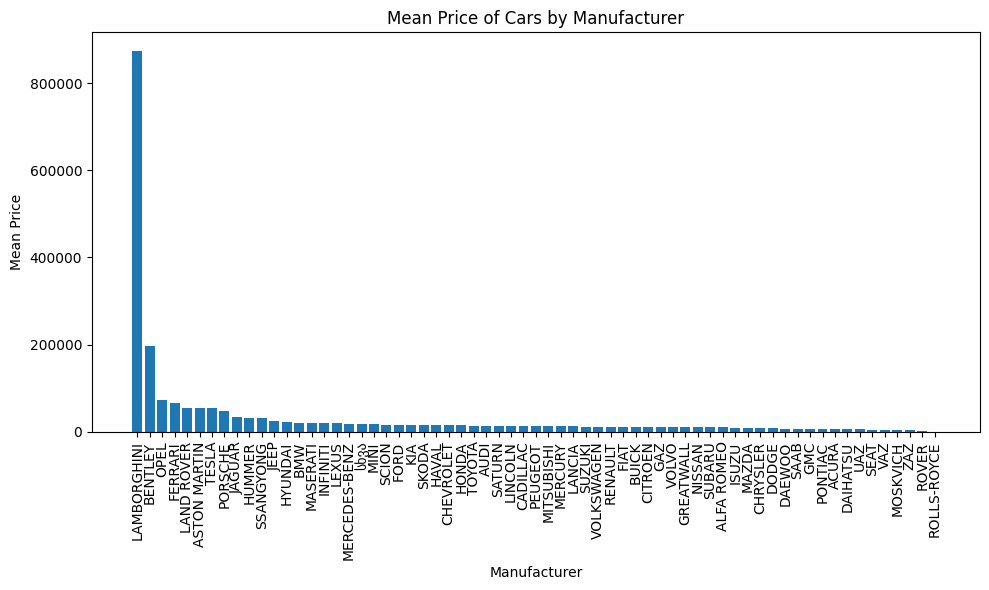

In [10]:
mean_price_per_manufacturer = df.groupby('Manufacturer')['Price'].mean().reset_index()

mean_price_per_manufacturer.columns = ['Manufacturer', 'Mean_Price']

mean_price_per_manufacturer = mean_price_per_manufacturer.sort_values(by='Mean_Price', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(mean_price_per_manufacturer['Manufacturer'], mean_price_per_manufacturer['Mean_Price'])
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.title('Mean Price of Cars by Manufacturer')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

*   As the figure shows, the significantly highest car pricein our data set is the Lamborghini.
*   which costs approximately 870000 usd or 31,633,200 Bath




### What is the average price for each year of production of a car?

In [11]:
mean_price_per_manufacturer = df.groupby('Prod. year')['Price'].mean().reset_index()
mean_price_per_manufacturer.columns = ['Prod. year', 'Mean_Price']
mean_price_per_manufacturer = mean_price_per_manufacturer.sort_values(by='Mean_Price', ascending=False)

overall_mean_price = mean_price_per_manufacturer['Mean_Price'].mean()

In [12]:
fig = px.bar(mean_price_per_manufacturer, x='Prod. year', y='Mean_Price',
             title='Mean Price per Production Year',
             labels={'Prod. year': 'Production Year', 'Mean_Price': 'Mean Price'},
             color='Mean_Price',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.add_trace(go.Scatter(x=mean_price_per_manufacturer['Prod. year'],
                         y=[overall_mean_price]*len(mean_price_per_manufacturer),
                         mode='lines',
                         line=dict(color='red', dash='dash')))

fig.add_annotation(
    x=mean_price_per_manufacturer['Prod. year'].iloc[-1],
    y=overall_mean_price,
    text="Overall Mean Price",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40
)
fig.show()



*   There are some old cars that have high prices but were manufactured since 1990. Go up and you will find that the newer it is, the higher the price will be.
*   The average price of all cars in this dataset is 16630 USD.



### Does leather interior have a big effect on the price of the car?

In [13]:
leather_interior = df[df['Leather interior'] == "Yes"]
not_leather_interior  = df[df['Leather interior'] == "No"]
count_leather = len(leather_interior)
count_not_leather = len(not_leather_interior)
leather_interior_df = pd.DataFrame({
    'Leather Interior': ['Yes', 'No'],
    'Count': [count_leather, count_not_leather]
})

<ipython-input-14-11ab88eed90c>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




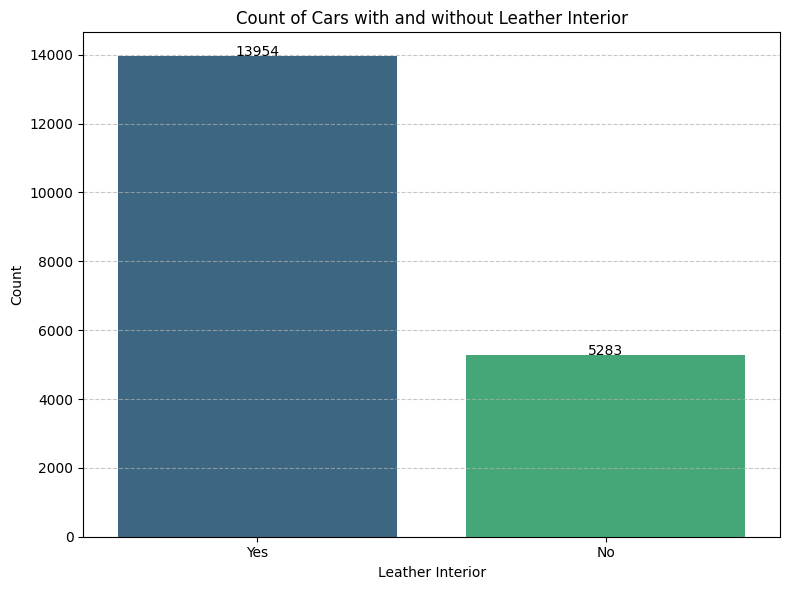

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Leather Interior', y='Count', data=leather_interior_df, palette='viridis')

for index, row in leather_interior_df.iterrows():
    plt.text(index, row['Count'], int(row['Count']), color='black', ha="center")

plt.xlabel('Leather Interior')
plt.ylabel('Count')
plt.title('Count of Cars with and without Leather Interior')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<ipython-input-15-3830a836c068>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




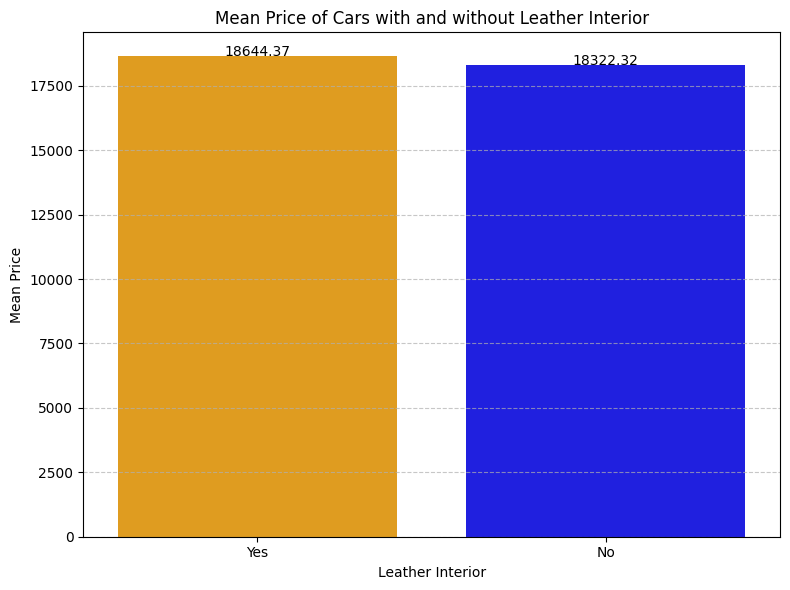

In [15]:
leather_interior_mean_price = leather_interior['Price'].mean()
not_leather_interior_mean_price = not_leather_interior['Price'].mean()
leather_interior_price_df = pd.DataFrame({
    'Leather Interior': ['Yes', 'No'],
    'Mean Price': [leather_interior_mean_price, not_leather_interior_mean_price]
})

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Leather Interior', y='Mean Price', data=leather_interior_price_df, palette=['orange', 'blue'])

for index, row in leather_interior_price_df.iterrows():
    plt.text(index, row['Mean Price'], f'{row["Mean Price"]:.2f}', color='black', ha="center")

plt.xlabel('Leather Interior')
plt.ylabel('Mean Price')
plt.title('Mean Price of Cars with and without Leather Interior')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



*   The number of cars with leather interiors is higher.
*   But the average price of both types of cars with leather interior and without leather interior are very close to each other.


## 2. Data preprocessing

In [16]:
df['Mileage'] = df['Mileage'].str.replace(' km', '').astype(float)

In [17]:
df['Turbo'] = df['Engine volume'].str.contains('Turbo').astype(int)
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '')

In [18]:
df['Doors'] = df['Doors'].replace({'04-May': 4, '02-Mar': 2, '>5': 5})

In [19]:
df['Wheel'] = df['Wheel'].replace({'Left wheel': 0, 'Right-hand drive': 1})
df.rename(columns={'Wheel': 'Drive'}, inplace=True)

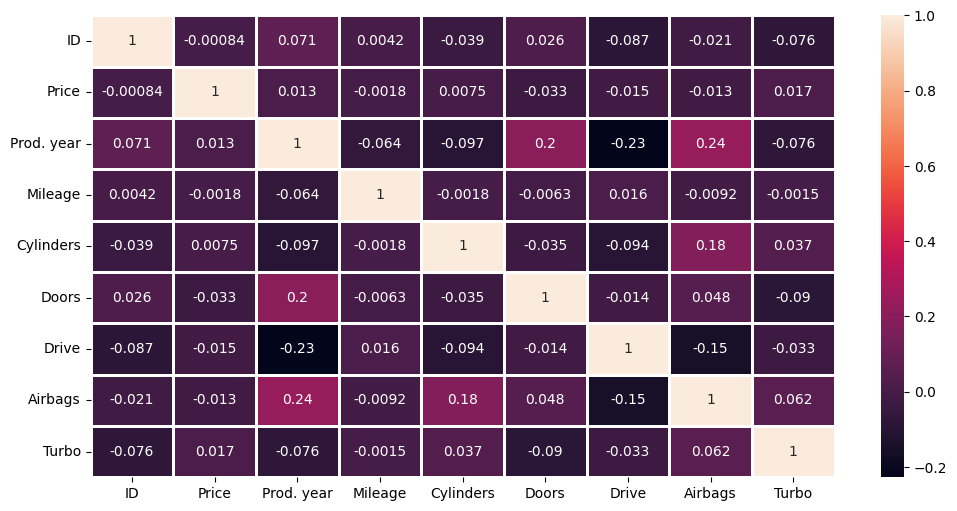

In [20]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize = (12, 6))

corr = numeric_df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [21]:
df.drop(['ID','Levy',], axis=1,errors='ignore', inplace=True)
df

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Drive,Color,Airbags,Turbo
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,0,Silver,12,0
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,4,0,Black,8,0
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,1,Black,2,0
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,0,White,0,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,0,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,2,0,Silver,5,1
19233,15681,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4,0,Red,8,0
19234,26108,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365.0,4.0,Automatic,Front,4,0,Grey,4,0
19235,5331,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258.0,4.0,Automatic,Front,4,0,Black,4,0


In [22]:
upper_limit = df['Price'].quantile(0.95)
lower_limit = df['Price'].quantile(0.05)
print("Price_Upper limit",upper_limit)
print("Price_Lower limit",lower_limit)

Price_Upper limit 49459.0
Price_Lower limit 314.0


In [23]:
upper_limit2 = df['Mileage'].quantile(0.98)
lower_limit2 = df['Mileage'].quantile(0.02)
print("Mileage_Upper limit",upper_limit2)
print("Mileage_Lower limit",lower_limit2)

Mileage_Upper limit 430000.0
Mileage_Lower limit 0.0


In [24]:
df = df[(df['Price'] < upper_limit) & (df['Price'] > lower_limit)].reset_index(drop=True)
df = df[(df['Mileage'] < upper_limit2) & (df['Mileage'] > lower_limit2)].reset_index(drop=True)
df.shape

(16145, 17)

In [25]:
num_attribs = ['Prod. year','Mileage','Cylinders','Engine volume','Airbags']
cat_attribs = ['Manufacturer','Model','Category','Leather interior','Fuel type','Turbo','Gear box type','Drive wheels','Doors','Drive','Color']

In [26]:
X = df.drop('Price',axis=1)
y = df[['Price']]

In [27]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

X = preprocessing.fit_transform(X)

In [28]:
X = X.toarray()

In [29]:
std_scaler = StandardScaler()
y = std_scaler.fit_transform(y)

In [30]:
X.shape

(16145, 1562)

In [31]:
y.shape

(16145, 1)

## 3. Data Modeling

In [32]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [33]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
 X_train, X_valid, y_train, y_valid  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [34]:
input_shape = X_train.shape[1:]

In [35]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=2, max_value=5)
    n_neurons = hp.Int("n_neurons", min_value=1000, max_value=1500)
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4, 1e-5])
    optimizer = RMSprop(learning_rate = hp_learning_rate)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=input_shape))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation='linear'))
    model.compile(loss="mse", optimizer=optimizer,
                  metrics=["mse"])
    return model

In [36]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="mse", max_trials=5, overwrite=True,
    directory="random_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 03m 49s]
mse: 0.2660503387451172

Best mse So Far: 0.15798704326152802
Total elapsed time: 00h 17m 58s


In [37]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 0 summary
Hyperparameters:
n_hidden: 4
n_neurons: 1019
learning_rate: 0.001
Score: 0.15798704326152802


In [38]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
best_params = top3_params[0].values
lr = best_params['learning_rate']
nr = best_params['n_neurons']
hl = best_params['n_hidden']

In [39]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=15,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_Carprice_prediction_model",
                                                         save_best_only=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

In [40]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape))

for _ in range(hl) :
  model.add(tf.keras.layers.Dense(nr, kernel_initializer="he_normal", activation="relu"))

model.add(tf.keras.layers.Dense(1, activation='linear'))

optimizer = RMSprop(learning_rate = lr)
model.compile(loss="mse", optimizer=optimizer, metrics=["mse"])
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, model_checkpoint_cb, lr_scheduler])

mse_test, rmse_test = model.evaluate(X_test, y_test)
print('The MSE value is: ', mse_test)
print('The RMSE value is: ', rmse_test)

Epoch 1/100
303/303 [==============================] - 21s 67ms/step - loss: 0.6108 - mse: 0.6108 - val_loss: 0.6297 - val_mse: 0.6297 - lr: 0.0010
Epoch 2/100
303/303 [==============================] - 19s 61ms/step - loss: 0.3418 - mse: 0.3418 - val_loss: 0.3654 - val_mse: 0.3654 - lr: 0.0010
Epoch 3/100
303/303 [==============================] - 21s 71ms/step - loss: 0.2906 - mse: 0.2906 - val_loss: 0.2859 - val_mse: 0.2859 - lr: 0.0010
Epoch 4/100
303/303 [==============================] - 18s 60ms/step - loss: 0.2548 - mse: 0.2548 - val_loss: 0.3139 - val_mse: 0.3139 - lr: 0.0010
Epoch 5/100
303/303 [==============================] - 18s 60ms/step - loss: 0.2264 - mse: 0.2264 - val_loss: 0.3106 - val_mse: 0.3106 - lr: 0.0010
Epoch 6/100
303/303 [==============================] - 20s 65ms/step - loss: 0.2084 - mse: 0.2084 - val_loss: 0.3358 - val_mse: 0.3358 - lr: 0.0010
Epoch 7/100
303/303 [==============================] - 19s 64ms/step - loss: 0.1874 - mse: 0.1874 - val_loss: 0.

### Next, let's try regularization.

method1 : l2 regularization(Ridge)

In [41]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape))

for _ in range(hl) :
  model.add(tf.keras.layers.Dense(nr, kernel_initializer="he_normal", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))

model.add(tf.keras.layers.Dense(1, activation='linear'))

optimizer = RMSprop(learning_rate = lr)
model.compile(loss="mse", optimizer=optimizer, metrics=["mse"])
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, model_checkpoint_cb, lr_scheduler])

mse_test, rmse_test = model.evaluate(X_test, y_test)
print('The MSE value is: ', mse_test)
print('The RMSE value is: ', rmse_test)

Epoch 1/100
303/303 [==============================] - 23s 73ms/step - loss: 3.5883 - mse: 0.6858 - val_loss: 1.3424 - val_mse: 0.8314 - lr: 0.0010
Epoch 2/100
303/303 [==============================] - 22s 71ms/step - loss: 0.5982 - mse: 0.3756 - val_loss: 0.4754 - val_mse: 0.3693 - lr: 0.0010
Epoch 3/100
303/303 [==============================] - 21s 69ms/step - loss: 0.4242 - mse: 0.3412 - val_loss: 0.3819 - val_mse: 0.3123 - lr: 0.0010
Epoch 4/100
303/303 [==============================] - 23s 77ms/step - loss: 0.3882 - mse: 0.3242 - val_loss: 0.4407 - val_mse: 0.3809 - lr: 0.0010
Epoch 5/100
303/303 [==============================] - 21s 70ms/step - loss: 0.3659 - mse: 0.3084 - val_loss: 0.4008 - val_mse: 0.3450 - lr: 0.0010
Epoch 6/100
303/303 [==============================] - 22s 73ms/step - loss: 0.3529 - mse: 0.2991 - val_loss: 0.4302 - val_mse: 0.3782 - lr: 0.0010
Epoch 7/100
303/303 [==============================] - 21s 69ms/step - loss: 0.3356 - mse: 0.2838 - val_loss: 0.

Method2: Dropout regularization

In [42]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape))

for _ in range(hl) :
  model.add(tf.keras.layers.Dropout(rate=0.05))
  model.add(tf.keras.layers.Dense(nr, kernel_initializer="he_normal", activation="relu"))

model.add(tf.keras.layers.Dropout(rate=0.05))
model.add(tf.keras.layers.Dense(1, activation='linear'))

optimizer = RMSprop(learning_rate = lr)
model.compile(loss="mse", optimizer=optimizer, metrics=["mse"])
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, model_checkpoint_cb, lr_scheduler])

mse_test, rmse_test = model.evaluate(X_test, y_test)
print('The MSE value is: ', mse_test)
print('The RMSE value is: ', rmse_test)

Epoch 1/100
303/303 [==============================] - 22s 69ms/step - loss: 0.6460 - mse: 0.6460 - val_loss: 0.4277 - val_mse: 0.4277 - lr: 0.0010
Epoch 2/100
303/303 [==============================] - 20s 65ms/step - loss: 0.4098 - mse: 0.4098 - val_loss: 0.3267 - val_mse: 0.3267 - lr: 0.0010
Epoch 3/100
303/303 [==============================] - 21s 68ms/step - loss: 0.3641 - mse: 0.3641 - val_loss: 0.3086 - val_mse: 0.3086 - lr: 0.0010
Epoch 4/100
303/303 [==============================] - 20s 65ms/step - loss: 0.3402 - mse: 0.3402 - val_loss: 0.3440 - val_mse: 0.3440 - lr: 0.0010
Epoch 5/100
303/303 [==============================] - 21s 71ms/step - loss: 0.3178 - mse: 0.3178 - val_loss: 0.3379 - val_mse: 0.3379 - lr: 0.0010
Epoch 6/100
303/303 [==============================] - 20s 65ms/step - loss: 0.3017 - mse: 0.3017 - val_loss: 0.3456 - val_mse: 0.3456 - lr: 0.0010
Epoch 7/100
303/303 [==============================] - 20s 66ms/step - loss: 0.2865 - mse: 0.2865 - val_loss: 0.

Method3: Alpha dropout

In [43]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape))

for _ in range(hl) :
  model.add(tf.keras.layers.Dense(nr, kernel_initializer="he_normal", activation="relu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.05))
model.add(tf.keras.layers.Dense(1, activation='linear'))

optimizer = RMSprop(learning_rate = lr)
model.compile(loss="mse", optimizer=optimizer, metrics=["mse"])
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, model_checkpoint_cb, lr_scheduler])

mse_test, rmse_test = model.evaluate(X_test, y_test)
print('The MSE value is: ', mse_test)
print('The RMSE value is: ', rmse_test)

Epoch 1/100
303/303 [==============================] - 21s 65ms/step - loss: 0.8846 - mse: 0.8846 - val_loss: 0.8797 - val_mse: 0.8797 - lr: 0.0010
Epoch 2/100
303/303 [==============================] - 19s 62ms/step - loss: 0.4055 - mse: 0.4055 - val_loss: 0.3401 - val_mse: 0.3401 - lr: 0.0010
Epoch 3/100
303/303 [==============================] - 21s 69ms/step - loss: 0.3289 - mse: 0.3289 - val_loss: 0.2979 - val_mse: 0.2979 - lr: 0.0010
Epoch 4/100
303/303 [==============================] - 19s 62ms/step - loss: 0.2927 - mse: 0.2927 - val_loss: 0.3075 - val_mse: 0.3075 - lr: 0.0010
Epoch 5/100
303/303 [==============================] - 19s 62ms/step - loss: 0.2640 - mse: 0.2640 - val_loss: 0.3089 - val_mse: 0.3089 - lr: 0.0010
Epoch 6/100
303/303 [==============================] - 20s 66ms/step - loss: 0.2435 - mse: 0.2435 - val_loss: 0.3791 - val_mse: 0.3791 - lr: 0.0010
Epoch 7/100
303/303 [==============================] - 19s 62ms/step - loss: 0.2222 - mse: 0.2222 - val_loss: 0.

Method4: Max-Norm regulrization

In [48]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape))

for _ in range(hl) :
  model.add(tf.keras.layers.Dense(nr, kernel_initializer="he_normal", activation="relu", kernel_constraint=tf.keras.constraints.max_norm(3)))

model.add(tf.keras.layers.AlphaDropout(rate=0.05))
model.add(tf.keras.layers.Dense(1, activation='linear'))

optimizer = RMSprop(learning_rate = lr)
model.compile(loss="mse", optimizer=optimizer, metrics=["mse"])
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, model_checkpoint_cb, lr_scheduler])

mse_test, rmse_test = model.evaluate(X_test, y_test)
print('The MSE value is: ', mse_test)
print('The RMSE value is: ', rmse_test)

Epoch 1/100
303/303 [==============================] - 26s 80ms/step - loss: 0.7426 - mse: 0.7426 - val_loss: 0.7508 - val_mse: 0.7508 - lr: 0.0010
Epoch 2/100
303/303 [==============================] - 23s 76ms/step - loss: 0.3974 - mse: 0.3974 - val_loss: 0.3386 - val_mse: 0.3386 - lr: 0.0010
Epoch 3/100
303/303 [==============================] - 22s 71ms/step - loss: 0.3273 - mse: 0.3273 - val_loss: 0.2936 - val_mse: 0.2936 - lr: 0.0010
Epoch 4/100
303/303 [==============================] - 23s 76ms/step - loss: 0.2935 - mse: 0.2935 - val_loss: 0.3159 - val_mse: 0.3159 - lr: 0.0010
Epoch 5/100
303/303 [==============================] - 24s 80ms/step - loss: 0.2649 - mse: 0.2649 - val_loss: 0.3104 - val_mse: 0.3104 - lr: 0.0010
Epoch 6/100
303/303 [==============================] - 22s 72ms/step - loss: 0.2476 - mse: 0.2476 - val_loss: 0.3838 - val_mse: 0.3838 - lr: 0.0010
Epoch 7/100
303/303 [==============================] - 23s 75ms/step - loss: 0.2234 - mse: 0.2234 - val_loss: 0.